In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import coint

In [ ]:
# Đọc dữ liệu từ Kaggle (thay thế đường dẫn file nếu cần)
df = pd.read_csv("/content/drive/MyDrive/AIE (AI in trading)/crypto_market_data_2018_2024.csv", parse_dates=["dates"])

# Hiển thị thông tin tổng quát về dataset
print("Thông tin về dataset:")
print(df.info())

# Xem trước 5 dòng dữ liệu
print("\nDữ liệu mẫu:")
print(df.head())

# Kiểm tra danh sách các coin trong dataset
unique_coins = df["symbol"].unique()
print("\nDanh sách các coin có trong dataset:", unique_coins)

# Đếm số lượng giao dịch của từng coin
coin_counts = df["symbol"].value_counts()
print("\nSố lượng dòng dữ liệu theo từng coin:")
print(coin_counts)


Thông tin về dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176745 entries, 0 to 2176744
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   dates      datetime64[ns]
 1   symbol     object        
 2   open       float64       
 3   close      float64       
 4   high       float64       
 5   low        float64       
 6   volume     float64       
 7   adj_close  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 132.9+ MB
None

Dữ liệu mẫu:
       dates   symbol      open     close      high       low      volume  \
0 2018-01-15  TEL-USD  0.004678  0.006031  0.007141  0.004678    842193.0   
1 2018-01-16  TEL-USD  0.006056  0.004935  0.006077  0.004112    573317.0   
2 2018-01-17  TEL-USD  0.004989  0.004539  0.005347  0.003257    477139.0   
3 2018-01-18  TEL-USD  0.004591  0.007200  0.008505  0.004443  15296600.0   
4 2018-01-19  TEL-USD  0.007133  0.008325  0.008325  0.006071  15603100.0   

 

In [ ]:
# Chuyển cột timestamp thành kiểu datetime nếu chưa có
df["dates"] = pd.to_datetime(df["dates"])

# Lọc dữ liệu từ 2023 trở đi
df = df[df["dates"].dt.year >= 2023]

# Kiểm tra lại dữ liệu sau khi lọc
print("Dữ liệu sau khi lọc từ năm 2023 trở đi:")
print(df.head())
print("\nSố lượng dòng dữ liệu sau khi lọc:", len(df))


Dữ liệu sau khi lọc từ năm 2023 trở đi:
          dates   symbol      open     close      high       low    volume  \
1812 2023-01-01  TEL-USD  0.001899  0.001901  0.001921  0.001881  502169.0   
1813 2023-01-02  TEL-USD  0.001901  0.001949  0.001968  0.001891  657847.0   
1814 2023-01-03  TEL-USD  0.001949  0.001920  0.001960  0.001901  542525.0   
1815 2023-01-04  TEL-USD  0.001920  0.001983  0.002021  0.001907  991181.0   
1816 2023-01-05  TEL-USD  0.001983  0.001943  0.001999  0.001936  733952.0   

      adj_close  
1812   0.001901  
1813   0.001949  
1814   0.001920  
1815   0.001983  
1816   0.001943  

Số lượng dòng dữ liệu sau khi lọc: 1173792



Số lượng giao dịch theo từng coin từ 2023:
symbol
TEL-USD                 774
JUV-USD                 774
OTO-USD                 774
LON-USD                 774
AMB-USD                 774
                       ... 
VADER34648-USD           10
BERA-USD                  7
STRX-USD                  1
MELANIA-OFFICIAL-USD      1
TRUMP-OFFICIAL-USD        1
Name: count, Length: 2017, dtype: int64


<ipython-input-25-0224435443f4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coin_counts.index[:10], y=coin_counts.values[:10], palette="viridis")


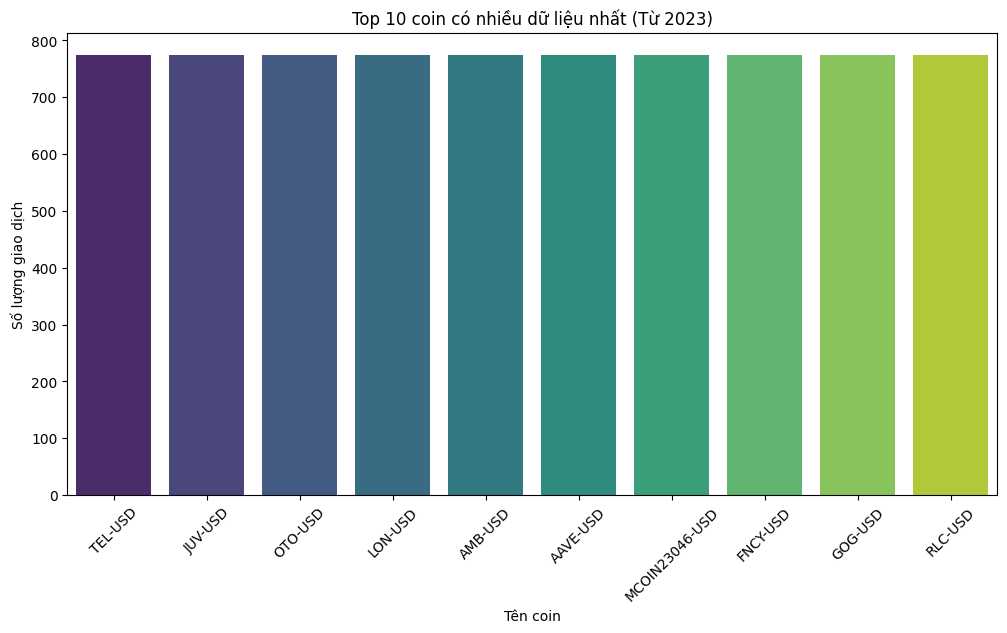

In [ ]:
# Đếm số lượng giao dịch của từng coin sau khi lọc
coin_counts = df["symbol"].value_counts()
print("\nSố lượng giao dịch theo từng coin từ 2023:")
print(coin_counts)

# Vẽ biểu đồ coin nào có nhiều dữ liệu nhất sau khi lọc
plt.figure(figsize=(12, 6))
sns.barplot(x=coin_counts.index[:10], y=coin_counts.values[:10], palette="viridis")
plt.xlabel("Tên coin")
plt.ylabel("Số lượng giao dịch")
plt.title("Top 10 coin có nhiều dữ liệu nhất (Từ 2023)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Đếm số lượng giao dịch của từng coin
coin_counts = df["symbol"].value_counts()

# Lấy danh sách 10 coin phổ biến nhất
top_10_coins = coin_counts.index[:10].tolist()
print("\nDanh sách 10 coin có nhiều giao dịch nhất từ 2023:")
print(top_10_coins)

# Lọc dữ liệu chỉ giữ lại 10 coin phổ biến
df = df[df["symbol"].isin(top_10_coins)]




Danh sách 10 coin có nhiều giao dịch nhất từ 2023:
['TEL-USD', 'JUV-USD', 'OTO-USD', 'LON-USD', 'AMB-USD', 'AAVE-USD', 'MCOIN23046-USD', 'FNCY-USD', 'GOG-USD', 'RLC-USD']


In [ ]:
# Tạo bảng pivot để lấy giá đóng cửa của từng coin
data = df.pivot(index="dates", columns="symbol", values="close")
data.dropna(inplace=True)  # Xóa các hàng có giá trị NaN

print("\nDữ liệu giá đóng cửa của 10 coin phổ biến nhất:")
data.head()



Dữ liệu giá đóng cửa của 10 coin phổ biến nhất:


symbol,AAVE-USD,AMB-USD,FNCY-USD,GOG-USD,JUV-USD,LON-USD,MCOIN23046-USD,OTO-USD,RLC-USD,TEL-USD
dates,,,,,,,,,,
2023-01-01,52.045834,0.011895,0.060810,0.058159,2.596259,0.572342,1.284110,0.089972,1.171033,0.001901
2023-01-02,53.083157,0.012243,0.061983,0.058204,2.614768,0.584536,1.322180,0.089979,1.169611,0.001949
2023-01-03,53.040043,0.012306,0.061401,0.058952,2.627981,0.583245,1.314254,0.089978,1.176189,0.001920
2023-01-04,56.787495,0.012676,0.061851,0.060747,2.644629,0.574345,1.333485,0.089979,1.186050,0.001983
2023-01-05,55.387627,0.012516,0.060961,0.061661,2.770573,0.537961,1.284746,0.089973,1.158011,0.001943



Các cặp coin có đồng liên kết tốt nhất: [('AMB-USD', 'FNCY-USD')]


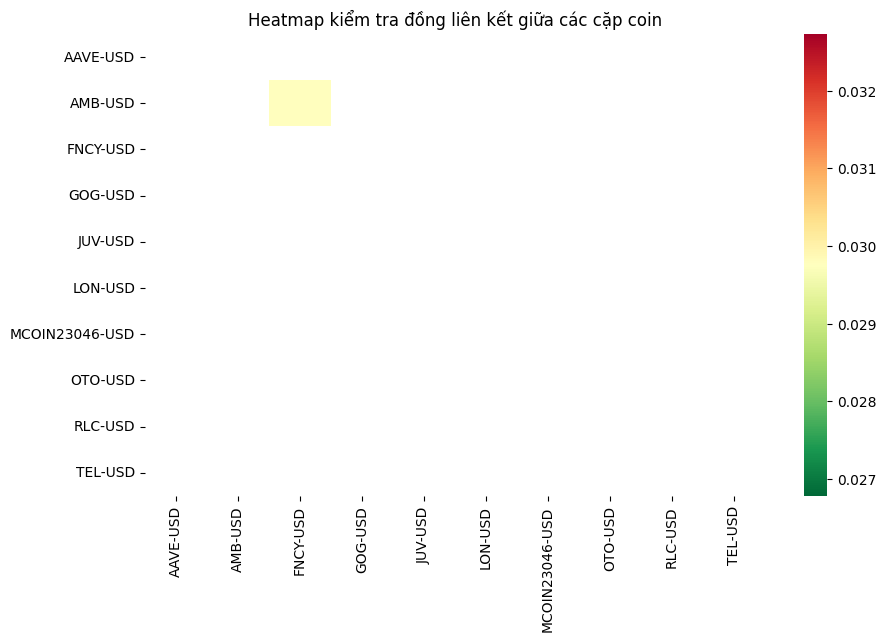

In [ ]:
from statsmodels.tsa.stattools import coint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.columns
    pairs = []

    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            _, pvalue, _ = coint(S1, S2)  # Kiểm tra đồng liên kết
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:  # Chỉ lấy những cặp có p-value < 0.05
                pairs.append((keys[i], keys[j]))

    return pvalue_matrix, pairs

# Tìm cặp coin có đồng liên kết
pvalues, cointegrated_pairs = find_cointegrated_pairs(data)
print("\nCác cặp coin có đồng liên kết tốt nhất:", cointegrated_pairs)

# Vẽ heatmap của p-values
plt.figure(figsize=(10,6))
sns.heatmap(pvalues, xticklabels=data.columns, yticklabels=data.columns, cmap="RdYlGn_r", mask=(pvalues >= 0.05))
plt.title("Heatmap kiểm tra đồng liên kết giữa các cặp coin")
plt.show()


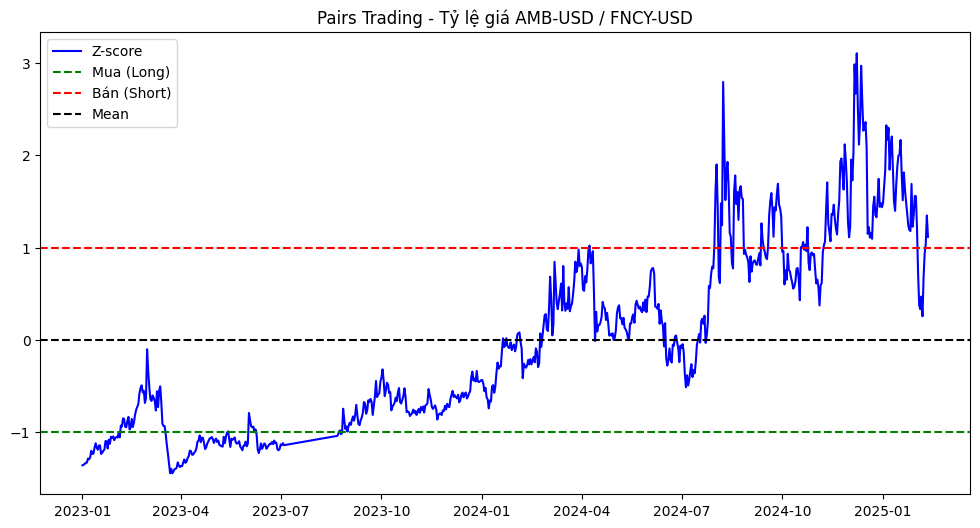

In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

# Chọn cặp coin có đồng liên kết tốt nhất
if len(cointegrated_pairs) > 0:
    coin1, coin2 = cointegrated_pairs[0]  # Chọn cặp đầu tiên
    ratios = data[coin1] / data[coin2]  # Tỷ lệ giá giữa 2 coin

    # Tính toán Z-score
    zscores = zscore(ratios)

    # Vẽ biểu đồ Z-score
    plt.figure(figsize=(12,6))
    plt.plot(zscores, label="Z-score", color="blue")
    plt.axhline(-1, color="green", linestyle="--", label="Mua (Long)")
    plt.axhline(1, color="red", linestyle="--", label="Bán (Short)")
    plt.axhline(0, color="black", linestyle="--", label="Mean")
    plt.legend()
    plt.title(f"Pairs Trading - Tỷ lệ giá {coin1} / {coin2}")
    plt.show()
else:
    print("Không tìm thấy cặp coin nào có đồng liên kết tốt.")


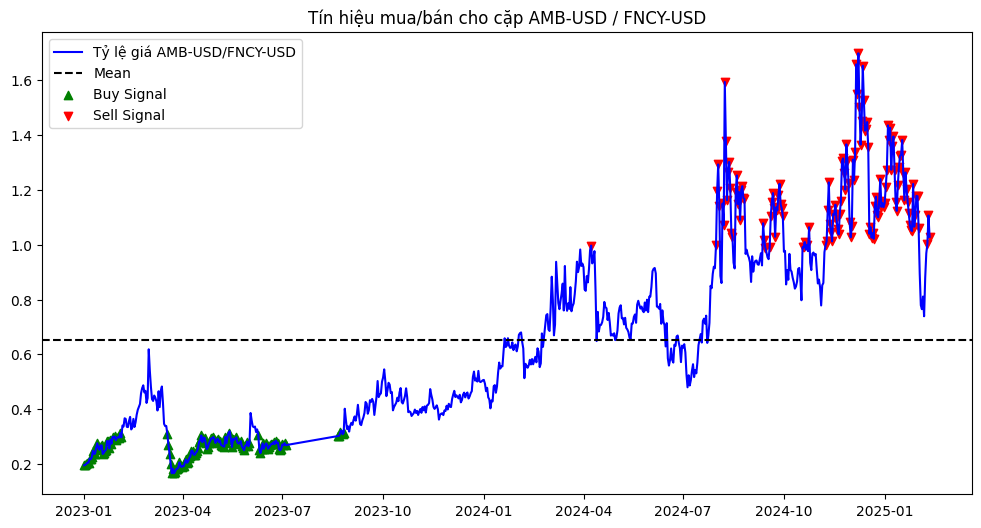

In [ ]:
# Xác định tín hiệu giao dịch
buy_signal = zscores < -1  # Mua khi Z-score < -1 (coin1 rẻ hơn coin2)
sell_signal = zscores > 1   # Bán khi Z-score > 1 (coin1 đắt hơn coin2)

# Vẽ tín hiệu trên biểu đồ
plt.figure(figsize=(12,6))
plt.plot(ratios, label=f"Tỷ lệ giá {coin1}/{coin2}", color="blue")
plt.axhline(ratios.mean(), color="black", linestyle="--", label="Mean")
plt.scatter(ratios.index[buy_signal], ratios[buy_signal], marker="^", color="green", label="Buy Signal", alpha=1)
plt.scatter(ratios.index[sell_signal], ratios[sell_signal], marker="v", color="red", label="Sell Signal", alpha=1)
plt.legend()
plt.title(f"Tín hiệu mua/bán cho cặp {coin1} / {coin2}")
plt.show()


In [ ]:
initial_balance = 1000  # Vốn ban đầu
balance = initial_balance
positions = 0  # Vị thế hiện tại

for i in range(len(ratios) - 1):
    if buy_signal.iloc[i]:  # Mua coin1, bán coin2
        positions += 1
        balance -= ratios.iloc[i]
    elif sell_signal.iloc[i]:  # Bán coin1, mua coin2
        positions -= 1
        balance += ratios.iloc[i]

# Tính toán lợi nhuận cuối cùng
final_balance = balance + positions * ratios.iloc[-1]
profit = final_balance - initial_balance

print(f"\nLợi nhuận từ chiến lược Pairs Trading: {profit:.2f} USDT")



Lợi nhuận từ chiến lược Pairs Trading: 130.04 USDT


In [ ]:
# Đọc  lại dữ liệu
df = pd.read_csv("/content/drive/MyDrive/AIE (AI in trading)/crypto_market_data_2018_2024.csv", parse_dates=["dates"])

# Lọc dữ liệu cho AMB/USD từ năm 2023 trở đi
df["dates"] = pd.to_datetime(df["dates"])
df = df[(df["symbol"] == "BTC-USD") & (df["dates"].dt.year >= 2023)]

# Sắp xếp theo thời gian
df.sort_values(by="dates", inplace=True)

# Kiểm tra dữ liệu
print("\nDữ liệu AMB-USD từ 2025:")
df.head()


Dữ liệu AMB-USD từ 2025:


<ipython-input-97-fcce5076b9b1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by="dates", inplace=True)


,dates,symbol,open,close,high,low,volume,adj_close
696900,2023-01-01,BTC-USD,16547.914062,16625.080078,16630.439453,16521.234375,9.244362e+09,16625.080078
696901,2023-01-02,BTC-USD,16625.509766,16688.470703,16759.343750,16572.228516,1.209778e+10,16688.470703
696902,2023-01-03,BTC-USD,16688.847656,16679.857422,16760.447266,16622.371094,1.390308e+10,16679.857422
696903,2023-01-04,BTC-USD,16680.205078,16863.238281,16964.585938,16667.763672,1.842174e+10,16863.238281
696904,2023-01-05,BTC-USD,16863.472656,16836.736328,16884.021484,16790.283203,1.369276e+10,16836.736328


In [ ]:

df["EMA_5"] = df[["high", "low", "close"]].mean(axis=1).ewm(span=5, adjust=False).mean()
df["EMA_20"] = df[["high", "low", "close"]].mean(axis=1).ewm(span=20, adjust=False).mean()
df["EMA_5"]

,EMA_5
696900,16592.251302
696901,16619.283420
696902,16642.041811
696903,16705.315418
696904,16749.214836
...,...
697669,97479.475056
697670,97049.720350
697671,97043.326588
697672,96819.480746


In [ ]:
def calculate_rsi(series, period=14): # Relative Strength Index
    delta = series.diff()  # Tính biến động giá

    gain = np.where(delta > 0, delta, 0)  # Lấy phần tăng
    loss = np.where(delta < 0, -delta, 0)  # Lấy phần giảm

    avg_gain = pd.Series(gain).ewm(span=period, adjust=False).mean()
    avg_loss = pd.Series(loss).ewm(span=period, adjust=False).mean()

    # Tránh lỗi chia cho 0 khi avg_loss = 0
    rs = np.where(avg_loss == 0, 0, avg_gain / (avg_loss + 1e-10))
    rsi = 100 - (100 / (1 + rs))

    return pd.Series(rsi, index=series.index)

# Áp dụng lại RSI
df["RSI"] = calculate_rsi(df["close"])

# Kiểm tra lại giá trị RSI
print("Giá trị RSI nhỏ nhất:", df["RSI"].min())
print("Giá trị RSI lớn nhất:", df["RSI"].max())


Giá trị RSI nhỏ nhất: 0.0
Giá trị RSI lớn nhất: 99.72772396518634


In [ ]:
df["Buy_Signal"] = (df["EMA_5"] > df["EMA_20"]) & (df["RSI"] <40)
df["Sell_Signal"] = (df["EMA_5"] < df["EMA_20"]) & (df["RSI"] > 60)

# Kiểm tra số tín hiệu
print("\nSố tín hiệu MUA:", df['Buy_Signal'].sum())
print("Số tín hiệu BÁN:", df['Sell_Signal'].sum())



Số tín hiệu MUA: 15
Số tín hiệu BÁN: 9


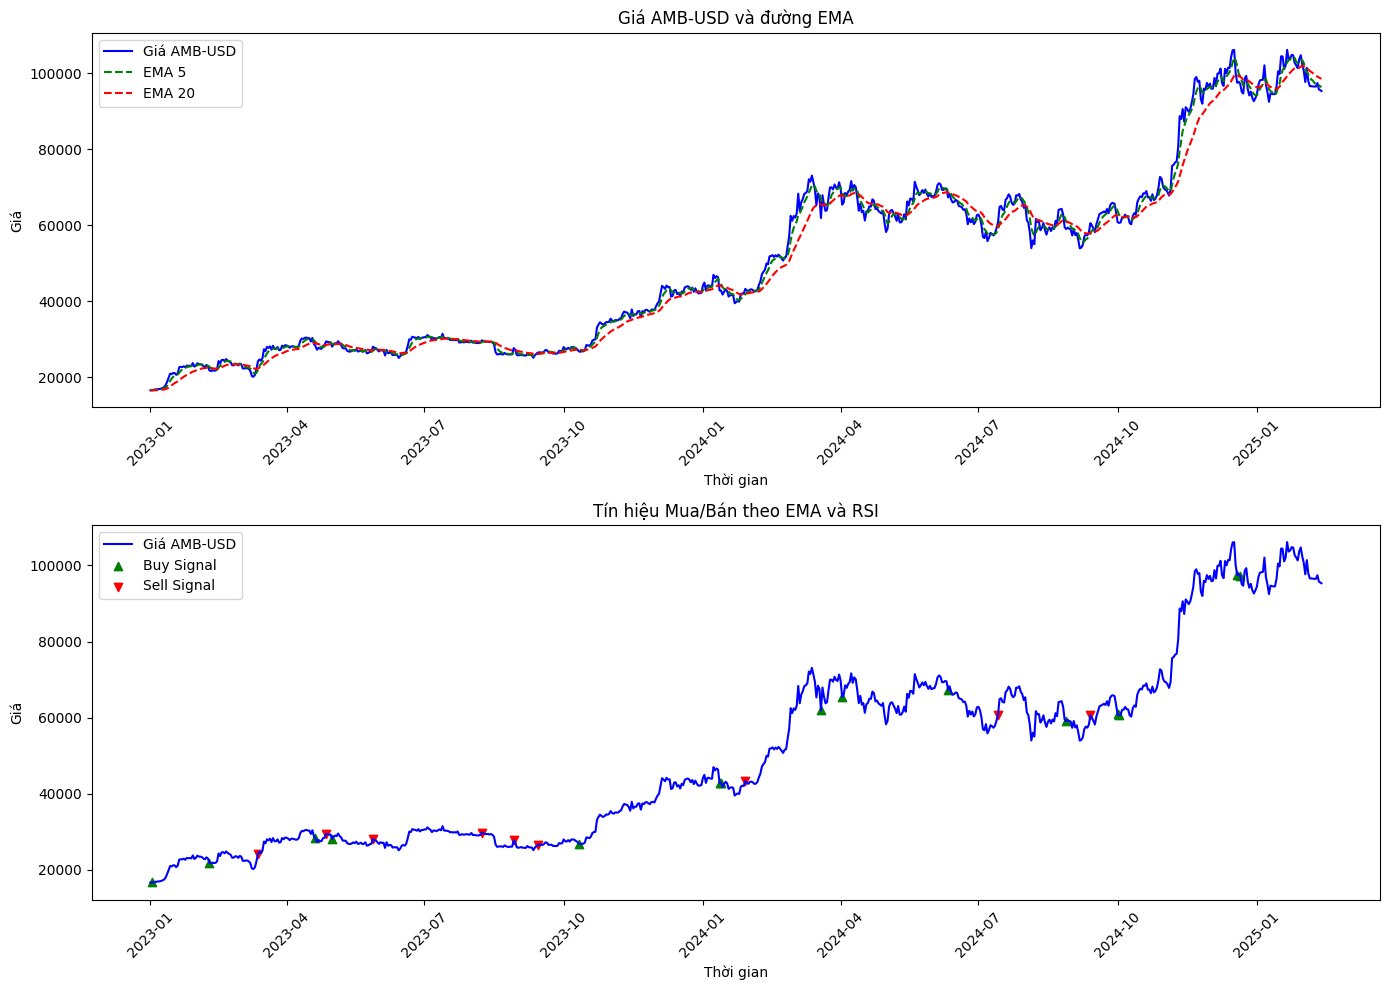

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))

# Biểu đồ 1: Hiển thị giá và EMA
plt.subplot(2,1,1)  # 2 hàng, 1 cột, biểu đồ thứ 1
plt.plot(df["dates"], df["close"], label="Giá AMB-USD", color="blue")
plt.plot(df["dates"], df["EMA_5"], label="EMA 5", color="green", linestyle="--")
plt.plot(df["dates"], df["EMA_20"], label="EMA 20", color="red", linestyle="--")
plt.legend()
plt.title("Giá AMB-USD và đường EMA")
plt.xlabel("Thời gian")
plt.ylabel("Giá")
plt.xticks(rotation=45)

# Biểu đồ 2: Hiển thị tín hiệu Buy/Sell
plt.subplot(2,1,2)  # 2 hàng, 1 cột, biểu đồ thứ 2
plt.plot(df["dates"], df["close"], label="Giá AMB-USD", color="blue")
plt.scatter(df["dates"][df["Buy_Signal"]], df["close"][df["Buy_Signal"]],
            marker="^", color="green", label="Buy Signal", alpha=1)
plt.scatter(df["dates"][df["Sell_Signal"]], df["close"][df["Sell_Signal"]],
            marker="v", color="red", label="Sell Signal", alpha=1)
plt.legend()
plt.title("Tín hiệu Mua/Bán theo EMA và RSI")
plt.xlabel("Thời gian")
plt.ylabel("Giá")
plt.xticks(rotation=45)

# Hiển thị 2 biểu đồ cùng lúc
plt.tight_layout()
plt.show()


In [ ]:
# Vốn ban đầu
initial_balance = 1000
balance = initial_balance
in_position = False
entry_price = 0
position_size = 0  # Số lượng coin mua được
fee = 0.001  # Phí giao dịch 0.1% (Binance thường thu 0.1%)

for i in range(len(df) - 1):
    # Mở lệnh MUA
    if df["Buy_Signal"].iloc[i] and not in_position:
        in_position = True
        entry_price = df["close"].iloc[i]
        position_size = balance / entry_price  # Mua số lượng tối đa có thể
        balance -= entry_price * position_size  # Trừ số tiền mua

    # Đóng lệnh BÁN
    elif df["Sell_Signal"].iloc[i] and in_position:
        in_position = False
        exit_price = df["close"].iloc[i]
        balance += exit_price * position_size  # Nhận lại tiền từ bán coin
        balance -= balance * fee  # Trừ phí giao dịch
        position_size = 0  # Reset số lượng coin

# Nếu vẫn còn vị thế MUA khi hết dữ liệu, đóng lệnh ở giá cuối cùng
if in_position:
    exit_price = df["close"].iloc[-1]
    balance += exit_price * position_size
    balance -= balance * fee
    position_size = 0

# Tính lợi nhuận cuối cùng
profit = balance - initial_balance
print(f"\nLợi nhuận từ Scalping AMB-USD: {profit:.2f} USDT")



Lợi nhuận từ Scalping AMB-USD: 2820.03 USDT
